In [1]:
import numpy as np
import scipy as sp
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from IPython.display import Image

# Bernoulli Distribution 베르누이분포

In [2]:
from scipy.stats import bernoulli

In [3]:
# 1개의 동전 던지기에서 숫자면의 개수
p = 0.5
mean, var, skew, kurt = bernoulli.stats(p, moments='mvsk')

In [4]:
print(mean, var, skew, kurt)

0.5 0.25 0.0 -2.0


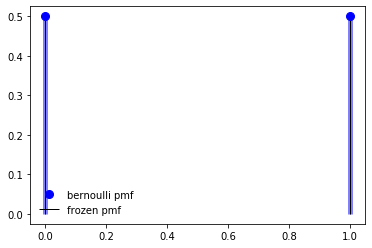

In [5]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 1, 2)
ax.plot(x, bernoulli.pmf(x, p), 'bo', ms=8, label='bernoulli pmf')
ax.vlines(x, 0, bernoulli.pmf(x, p), colors='b', lw=5, alpha=0.5)
rv = bernoulli(p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
         label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

In [26]:
bernoulli.ppf(0.01, p)

0.0

In [27]:
bernoulli.ppf(0.99, p)

1.0

In [28]:
bernoulli.pmf(0, p)

0.5

In [29]:
bernoulli.pmf(1, p)

0.5

# Binomial Distribution

In [7]:
from scipy.stats import binom

In [8]:
# 5개의 동전 던지기에서 숫자면의 수
n, p = 5, 0.5
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

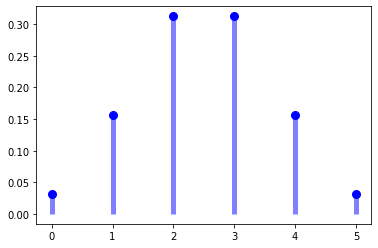

In [9]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 5, 6)
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

# Poisson Distribution

In [10]:
from scipy.stats import poisson

In [12]:
mu = 1
r = poisson.rvs(mu, size=10000)
table_poisson_mu_1 = pd.crosstab(index = r, colnames = ["포아송난수"], columns = "도수")
print(table_poisson_mu_1)

포아송난수    도수
row_0      
0      3693
1      3668
2      1833
3       629
4       138
5        30
6         8
7         1


### ecdf (Empirical Cumulative Distribution Function) 누적

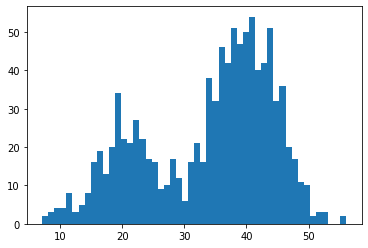

In [14]:
# example of a bimodal data sample
from matplotlib import pyplot
from numpy.random import normal
from numpy import hstack
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))
# plot the histogram
pyplot.hist(sample, bins=50)
pyplot.show()

In [16]:
# fit a ecdf
ecdf = ECDF(sample)

In [17]:
# get cumulative probability for values
print('P(x<20): %.3f' % ecdf(20))
print('P(x<40): %.3f' % ecdf(40))
print('P(x<60): %.3f' % ecdf(60))

P(x<20): 0.144
P(x<40): 0.647
P(x<60): 1.000


In [21]:
sp.pmf(sample,60)

AttributeError: module 'scipy' has no attribute 'pmf'

In [22]:
np.random.seed(987654321)
x = stats.norm.rvs(loc=1, size=100)
print(x)
stats.kstest(x,'norm', alternative = 'less')

[ 3.24655081e+00  3.54081775e-01 -1.83576993e-01  2.92949252e+00
  1.06681399e+00  2.94024210e-03  1.81532983e+00 -3.40936814e-01
  2.91063691e+00  1.70958340e+00  2.12934689e+00 -1.39547966e-01
  1.30905538e+00  4.05533245e-01 -9.13333436e-02  1.36670218e+00
  6.12322286e-01 -6.37015924e-01  2.72597760e+00  1.78509000e+00
  1.63339699e-01  1.48617172e+00  1.81939213e+00  2.55697790e+00
  1.48367767e+00 -8.32650506e-01 -8.35563443e-02 -3.32366210e-01
  1.44165047e+00  3.09385567e+00 -4.32218705e-01  1.98824110e+00
  7.02519193e-01  7.05422900e-01 -1.99973135e-01  8.57317937e-01
 -7.46777191e-01  5.62373955e-01 -2.05166263e-01  3.89933590e-01
  7.96547101e-01  1.08531001e+00  2.85372594e+00  3.85172716e-01
  1.09115138e+00  1.36702741e+00  1.33728978e+00 -1.40357465e+00
 -8.46486793e-03  6.47816351e-01  1.59803017e+00  1.57302660e+00
  1.21565208e+00  5.63780336e-01  1.20902803e+00  1.40601726e+00
  8.87667027e-01  1.34113861e+00 -4.35777021e-01  1.71924928e+00
  2.02244615e+00  2.46363

KstestResult(statistic=0.3930693698027639, pvalue=9.773534889196286e-15)

In [25]:
stats.shapiro(x)

(0.9879568219184875, 0.5050297379493713)